In [ ]:
#! pip install pyperclip


# Trusted zone - Household


In [1]:
import duckdb
import pyperclip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.precision', 3)


In [2]:
def DBtable_to_df(table):
    """
    Converts the DB `table` in a data frame format 
    """
    repo = ''.join(filter(str.isalpha, table))
    con = duckdb.connect(f'{repo}.duckdb')
    df = con.execute(f'SELECT * FROM {table}').df()
    con.close()
    return df


def rm_total_rows(df):
    """
    Removes the total rows from the household data source.
    """
    return df[pd.to_numeric(df['section'], errors='coerce').notnull()]


tmp = DBtable_to_df('household')
df = rm_total_rows(tmp)


### Test


In [3]:
drows = 21 + 1  # delete: for all the 21 sections detete the total of each one
# + total of all the sections (21 + 1 = 22)

# check if the rows are delated for all 3 versions
assert tmp.shape[0] - df.shape[0] == 3*drows


## Data profiling


The enitire dataframe could conatain `float64` type values. However, we are already interested in section and year being string type values, since section is a code and year is the version of the dataset.


In [8]:
df.dtypes


section                                                                    object
population                                                                float64
single_women_aged_16_to_64                                                float64
single_men_aged_16_to_64                                                  float64
single_women_aged_65_or_over                                              float64
single_men_aged_65_or_over                                                float64
adult_women_with_one_or_more_minors                                       float64
adult_men_with_one_or_more_minors                                         float64
two_adults_from_16_to_64_and_without_minors                               float64
two_adults_one_at_least_65_and_without_minors                             float64
two_adults_and_one_minor                                                  float64
two_adults_and_two_minors                                                 float64
two_adults_and_t

In the plots below, we can verify with the kernel density estimation, there are variables that do not follow the Gaussian curve so that it does not adapt a random variable to a function that depends on the mean and the standard deviation.


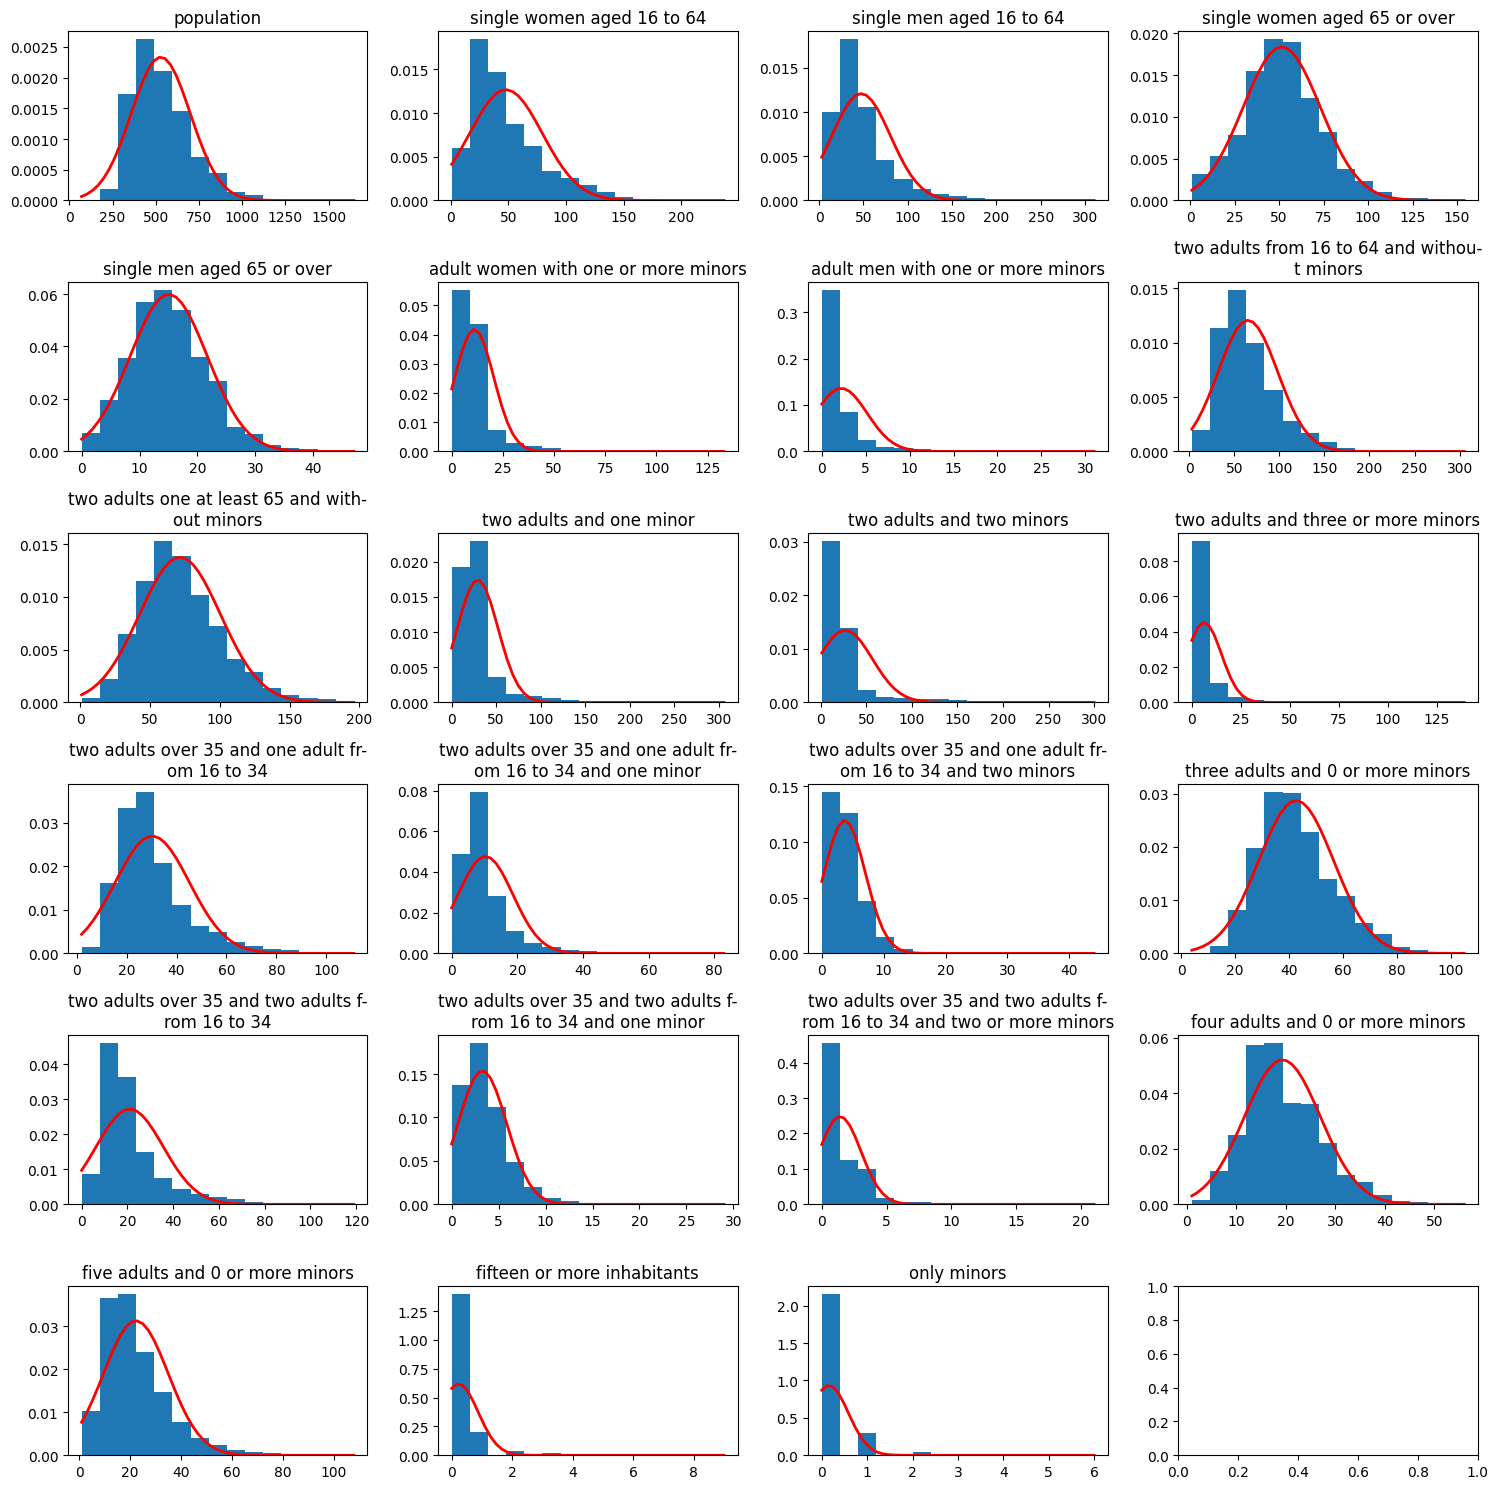

In [6]:
fig, axes = plt.subplots(6, 4, figsize=(15, 15))

# We skip section feature and year
for i, c in enumerate(df.columns[1:-1]):
    ax = axes.reshape(-1)[i]

    count, bins, ignore = ax.hist(df[c], 15, density=True)
    sigma = df[c].std()
    mu = df[c].mean()
    dbins = np.linspace(bins[0], bins[-1])
    ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                           / (2 * sigma**2)), linewidth=2, color='red')
    c = c.replace('_', ' ')
    title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
    t = ax.set_title(title)

plt.tight_layout()


Already in the above illustration we may have noticed some of these inconsistent values, but we will use the following table in conjunction to reach a conclusion.


In [5]:
df.describe()


,population,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors
count,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,...,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000
mean,528.872,48.079,47.395,51.515,15.039,11.033,2.225,65.191,71.452,29.175,...,10.300,3.702,42.690,21.031,3.267,1.410,19.295,22.344,0.230,0.160
std,170.889,31.490,33.014,21.728,6.665,9.535,2.935,33.039,29.016,22.895,...,8.368,3.337,13.907,14.643,2.595,1.605,7.676,12.737,0.645,0.427
min,71.000,1.000,3.000,1.000,0.000,0.000,0.000,3.000,1.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
25%,404.000,25.000,26.000,38.000,10.000,6.000,1.000,42.000,51.000,17.000,...,5.000,2.000,32.000,12.000,1.000,0.000,14.000,13.000,0.000,0.000
50%,498.000,40.000,39.000,50.000,14.000,9.000,1.000,59.000,68.000,23.000,...,8.000,3.000,41.000,17.000,3.000,1.000,18.000,19.000,0.000,0.000
75%,624.000,63.000,59.000,65.000,19.000,13.000,3.000,81.000,88.000,32.000,...,12.000,5.000,51.000,25.000,5.000,2.000,24.000,28.000,0.000,0.000
max,1646.000,237.000,310.000,154.000,47.000,133.000,31.000,305.000,196.000,306.000,...,83.000,44.000,105.000,119.000,29.000,21.000,56.000,108.000,9.000,6.000


* **population:**
* **single_women_aged_16_to_64:**
* **single_men_aged_16_to_64:**
* **single_women_aged_65_or_over:**
* **single_men_aged_65_or_over:**
* **adult_women_with_one_or_more_minors:**
* **adult_men_with_one_or_more_minors:**
* **two_adults_from_16_to_64_and_without_minors:**
* **two_adults_one_at_least_65_and_without_minors:**
* **two_adults_and_one_minor:**
* **two_adults_and_two_minors:**
* **two_adults_and_three_or_more_minors:**
* **two_adults_over_35_and_one_adult_from_16_to_34:**
* **two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor:**
* **two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors:**
* **three_adults_and_0_or_more_minors:**
* **two_adults_over_35_and_two_adults_from_16_to_34:**
* **two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor:**
* **two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors:**
* **four_adults_and_0_or_more_minors:**
* **five_adults_and_0_or_more_minors:**
* **fifteen_or_more_inhabitants:**
* **only_minors:**

In [20]:
pyperclip.copy(df.columns[6])

### Bivariate analysis


In [ ]:
corrmat = df[1:-1].corr()
corrmat


In [ ]:

sns.heatmap(corrmat, square=False,)


### Duplicates


In [ ]:
duplicate = df[df.duplicated()]
duplicate.sum()  # there are no duplicates, is empty


### Missimg values


In [ ]:
df.isnull().sum()  # there are no missing values is empty
